## Random Forest Algorithm

- Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML.

- It is based on the concept of **ensemble learning**, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

- As the name suggests, **"Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset."** Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

- **The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting**.

The below diagram explains the working of the Random Forest algorithm:

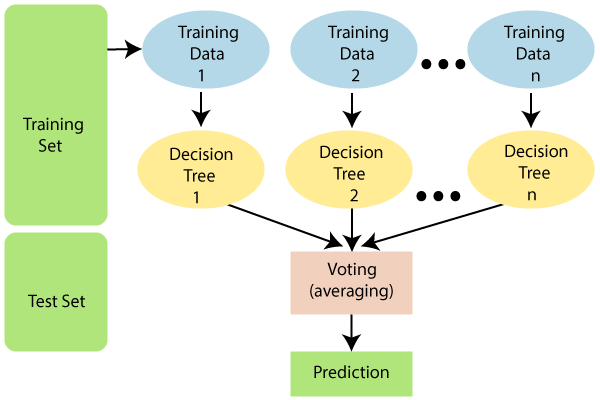

## Assumptions for Random Forest

Since the random forest combines multiple trees to predict the class of the dataset, it is possible that some decision trees may predict the correct output, while others may not. But together, all the trees predict the correct output. Therefore, below are two assumptions for a better Random forest classifier:

- There should be some actual values in the feature variable of the dataset so that the classifier can predict accurate results rather than a guessed result.

- The predictions from each tree must have very low correlations.

## Why use Random Forest?

Below are some points that explain why we should use the Random Forest algorithm:

- It takes less training time as compared to other algorithms.

- It predicts output with high accuracy, even for the large dataset it runs efficiently.

- It can also maintain accuracy when a large proportion of data is missing.

## How does Random Forest algorithm work?

Random Forest works in two-phase first is to create the random forest by combining N decision tree, and second is to make predictions for each tree created in the first phase.

The Working process can be explained in the below steps and diagram:**

**Step-1**: Select random K data points from the training set.

**Step-2**: Build the decision trees associated with the selected data points (Subsets).

**Step-3**: Choose the number N for decision trees that you want to build.

**Step-4**: Repeat Step 1 & 2.

**Step-5**: For new data points, find the predictions of each decision tree, and assign the new data points to the category that wins the majority votes.

The workg of the algorithm can be better understood by the below example:

**Example:**

Suppose there is a dataset that contains multiple fruit images. So, this dataset is given to the Random forest classifier. The dataset is divided into subsets and given to each decision tree. During the training phase, each decision tree produces a prediction result, and when a new data point occurs, then based on the majority of results, the Random Forest classifier predicts the final decision. Consider the below image:

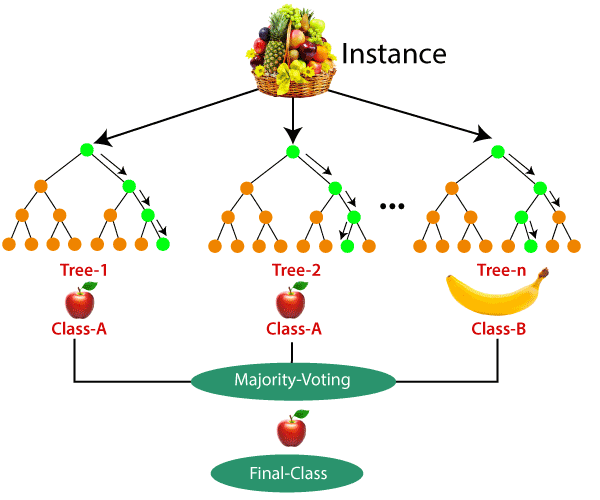

## Applications of Random Forest

There are mainly four sectors where Random forest mostly used:

1.**Banking**: Banking sector mostly uses this algorithm for the identification of loan risk.

2.**Medicine**: With the help of this algorithm, disease trends and risks of the disease can be identified.

3.**Land Use**: We can identify the areas of similar land use by this algorithm.

4.**Marketing**: Marketing trends can be identified using this algorithm.

## Types of Ensemble Methods

There are various types of ensemble learning methods, including:

- **Bagging (Bootstrap Aggregating)**: This method involves training multiple models on random subsets of the training data. The predictions from the individual models are then combined, typically by averaging.

- **Boosting**: This method involves training a sequence of models, where each subsequent model focuses on the errors made by the previous model. The predictions are combined using a weighted voting scheme.

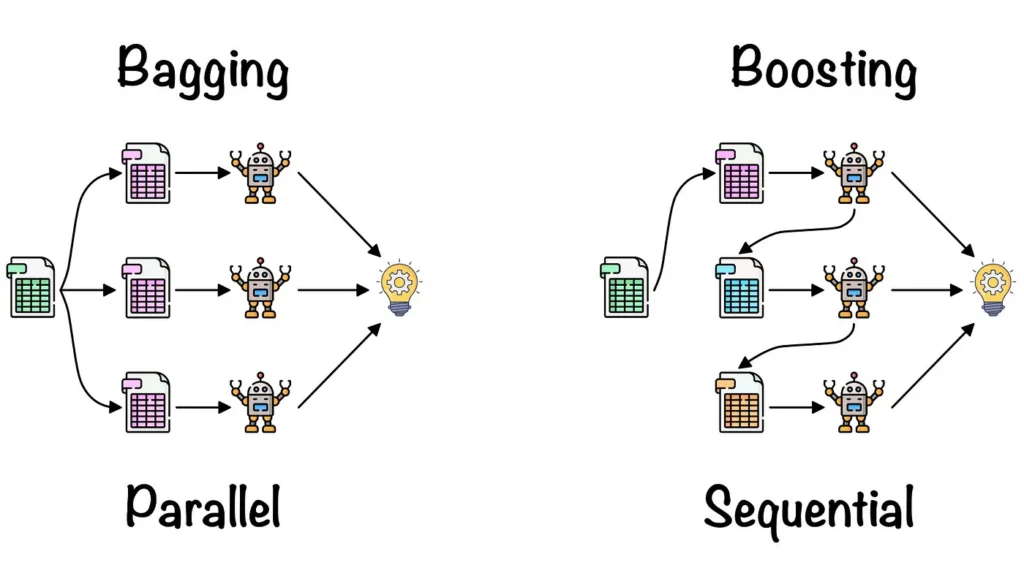

## Advantages of Random Forest

- Random Forest is capable of performing both Classification and Regression tasks.

- 
It is capable of handling large datasets with high dimensionality

- 
It enhances the accuracy of the model and prevents the overfitting issue.

## Disadvantages of Random Forest

- Although random forest can be used for both classification and regression tasks, it is not more suitable for Regression tasks.

## Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

In [2]:
data = pd.read_csv(r"C:\Users\devad\Downloads\car_evaluation.csv")
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [3]:
data.shape

(1727, 7)

In [4]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
data.tail()

,vhigh,vhigh.1,2,2.1,small,low,unacc
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [6]:
data.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [7]:
data.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [14]:
data.rename(columns = {'vhigh':'buying','vhigh.1':'maint','2':'doors','2.1':'Persons','small':'lug_boot','low':'safety','unacc':'class'},inplace=True)

In [15]:
data

,buying,maint,doors,Persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [17]:
col_names = ['buying','maint','doors','Persons','lug_boot','safety','class']

for col in col_names:
    print(data[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
Persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['buying'] = label_encoder.fit_transform(data['buying'])

In [20]:
data

,buying,maint,doors,Persons,lug_boot,safety,class
0,3,vhigh,2,2,small,med,unacc
1,3,vhigh,2,2,small,high,unacc
2,3,vhigh,2,2,med,low,unacc
3,3,vhigh,2,2,med,med,unacc
4,3,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,1,low,5more,more,med,med,good
1723,1,low,5more,more,med,high,vgood
1724,1,low,5more,more,big,low,unacc
1725,1,low,5more,more,big,med,good


In [22]:
data['buying'].value_counts()

buying
0    432
2    432
1    432
3    431
Name: count, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder

ml = LabelEncoder()

data['maint'] = ml.fit_transform(data['maint'])

print("Label Encoder :",data['maint'].head())

Label Encoder : 0    3
1    3
2    3
3    3
4    3
Name: maint, dtype: int64


In [26]:
data

,buying,maint,doors,Persons,lug_boot,safety,class
0,3,3,2,2,small,med,unacc
1,3,3,2,2,small,high,unacc
2,3,3,2,2,med,low,unacc
3,3,3,2,2,med,med,unacc
4,3,3,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,1,1,5more,more,med,med,good
1723,1,1,5more,more,med,high,vgood
1724,1,1,5more,more,big,low,unacc
1725,1,1,5more,more,big,med,good


In [36]:
from sklearn.preprocessing import LabelEncoder

ml = LabelEncoder()

data['doors'] = ml.fit_transform(data['doors'])

print("Label Encoder :",data['doors'].head())

Label Encoder : 0    0
1    0
2    0
3    0
4    0
Name: doors, dtype: int64


In [37]:
from sklearn.preprocessing import LabelEncoder

ml = LabelEncoder()

data['Persons'] = ml.fit_transform(data['Persons'])

print("Label Encoder :",data['Persons'].head())

Label Encoder : 0    0
1    0
2    0
3    0
4    0
Name: Persons, dtype: int64


In [39]:
from sklearn.preprocessing import LabelEncoder

ml = LabelEncoder()

data['lug_boot'] = ml.fit_transform(data['lug_boot'])

print("Label Encoder :",data['lug_boot'].head())

Label Encoder : 0    2
1    2
2    1
3    1
4    1
Name: lug_boot, dtype: int64


In [40]:
from sklearn.preprocessing import LabelEncoder

ml = LabelEncoder()

data['safety'] = ml.fit_transform(data['safety'])

print("Label Encoder :",data['safety'].head())

Label Encoder : 0    2
1    0
2    1
3    2
4    0
Name: safety, dtype: int64


In [41]:
from sklearn.preprocessing import LabelEncoder

ml = LabelEncoder()

data['class'] = ml.fit_transform(data['class'])

print("Label Encoder :",data['class'].head())

Label Encoder : 0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64


In [42]:
data

,buying,maint,doors,Persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [43]:
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(data)

le = LabelEncoder()

for column in df.columns:
    df[column] = le.fit_transform(df[column])

print(df)

      buying  maint  doors  Persons  lug_boot  safety  class
0          3      3      0        0         2       2      2
1          3      3      0        0         2       0      2
2          3      3      0        0         1       1      2
3          3      3      0        0         1       2      2
4          3      3      0        0         1       0      2
...      ...    ...    ...      ...       ...     ...    ...
1722       1      1      3        2         1       2      1
1723       1      1      3        2         1       0      3
1724       1      1      3        2         0       1      2
1725       1      1      3        2         0       2      1
1726       1      1      3        2         0       0      3

[1727 rows x 7 columns]


In [45]:
df = data

In [46]:
data

,buying,maint,doors,Persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1727 non-null   int64
 1   maint     1727 non-null   int64
 2   doors     1727 non-null   int64
 3   Persons   1727 non-null   int64
 4   lug_boot  1727 non-null   int64
 5   safety    1727 non-null   int64
 6   class     1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [51]:
x = data.drop('class',axis=1)
y = data['class']

In [52]:
x.head()

,buying,maint,doors,Persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


In [53]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state= 0)

In [83]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (1381, 6)
y_train: (1381,)
x_test: (346, 6)
y_test: (346,)


In [84]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
y_pred = rfc.predict(x_test)

In [86]:
y_pred

array([2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 3, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 0, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1,
       0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 3, 0, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 2, 3, 2, 1, 2, 2, 2, 2, 0, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 0, 2,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 3, 0, 3, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 3,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2,

In [87]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred,y_test)*100

print("Model accuracy:",accuracy)

Model accuracy: 98.84393063583815
